### The objective of this Jupyter Notebook is meet the mean of price of each city of Seattle and the Airbnb distribution in seattle

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

seattle_scraped = pd.read_csv('./Seattle/scraped.csv')
seattle_scraped.head()

C:\Users\giova\Anaconda3\envs\Datascience_blog\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2318,https://www.airbnb.com/rooms/2318,20190922030624,2019-09-22,Casa Madrona - Urban Oasis 1 block from the park!,"Gorgeous, architect remodeled, 1917 Dutch Colo...","Casa Madrona is a gorgeous, architect remodele...","Gorgeous, architect remodeled, 1917 Dutch Colo...",none,Madrona is a hidden gem of a neighborhood. It ...,...,f,f,strict_14_with_grace_period,f,f,2,2,0,0,0.21
1,5682,https://www.airbnb.com/rooms/5682,20190922030624,2019-09-22,"Cozy Studio, min. to downtown -WiFi",The Cozy Studio is a perfect launchpad for you...,"Hello fellow travelers, Save some money and ha...",The Cozy Studio is a perfect launchpad for you...,none,NaN,...,f,f,strict_14_with_grace_period,f,t,1,1,0,0,3.99
2,6606,https://www.airbnb.com/rooms/6606,20190922030624,2019-09-22,"Fab, private seattle urban cottage!","This tiny cottage is only 15x10, but it has ev...","Soo centrally located, this is a little house ...","This tiny cottage is only 15x10, but it has ev...",none,"A peaceful yet highly accessible neighborhood,...",...,f,f,strict_14_with_grace_period,f,f,3,3,0,0,1.19
3,9419,https://www.airbnb.com/rooms/9419,20190922030624,2019-09-22,Glorious sun room w/ memory foambed,This beautiful double room features a magical ...,Our new Sunny space has a private room from th...,This beautiful double room features a magical ...,none,"Lots of restaurants (see our guide book) bars,...",...,f,f,moderate,t,t,8,0,8,0,1.29
4,9460,https://www.airbnb.com/rooms/9460,20190922030624,2019-09-22,Downtown Convention Center B&B -- Free Minibar,Take up a glass of wine and unwind on one of t...,Greetings from Seattle. Thanks for considering...,Take up a glass of wine and unwind on one of t...,none,The apartment is situated at the intersection ...,...,t,f,moderate,f,f,4,3,1,0,3.62


In [2]:
seattle_scraped["price"]

0       $296.00
1        $48.00
2        $90.00
3        $62.00
4        $99.00
         ...   
9035    $137.00
9036     $35.00
9037     $35.00
9038    $120.00
9039    $170.00
Name: price, Length: 9040, dtype: object

In [3]:
seattle_listings = pd.read_csv('./Seattle/listings.csv')
seattle_listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2318,Casa Madrona - Urban Oasis 1 block from the park!,2536,Megan,Central Area,Madrona,47.61082,-122.29082,Entire home/apt,296,30,28,2019-08-30,0.21,2,84
1,5682,"Cozy Studio, min. to downtown -WiFi",8993,Maddy,Delridge,South Delridge,47.52398,-122.35989,Entire home/apt,48,3,462,2018-11-24,3.99,1,0
2,6606,"Fab, private seattle urban cottage!",14942,Joyce,Other neighborhoods,Wallingford,47.65411,-122.33761,Entire home/apt,90,2,147,2019-09-07,1.19,3,85
3,9419,Glorious sun room w/ memory foambed,30559,Angielena,Other neighborhoods,Georgetown,47.55062,-122.32014,Private room,62,2,144,2019-09-02,1.29,8,365
4,9460,Downtown Convention Center B&B -- Free Minibar,30832,Siena,Downtown,First Hill,47.61265,-122.32936,Private room,99,3,443,2019-09-02,3.62,4,150


In [4]:
seattle_listings["price"]

0       296
1        48
2        90
3        62
4        99
       ... 
9035    137
9036     35
9037     35
9038    120
9039    170
Name: price, Length: 9040, dtype: int64

#### We have two diferents datasets that provide information of each airbnb. About the price in the seattle_scraped data set we have the issue that the value has the dollar symbol, so we will use the praice of  the seattle_listings dataset, for do that we will merge two datasets, using the id value as a key. 

In [5]:
seattle_listings_all = pd.merge(left=seattle_listings,right=seattle_scraped, left_on='id', right_on='id')

#### With the two datasets merged, we will evalute the two diferents prices that we have, with the goal to see if exits some diferents between the prices, as we can see doesn't extist diferentes, we can use the price_x.

In [13]:
seattle_listings_all[["price_x","price_y"]]

,price_x,price_y
0,296,$296.00
1,48,$48.00
2,90,$90.00
3,62,$62.00
4,99,$99.00
...,...,...
9035,137,$137.00
9036,35,$35.00
9037,35,$35.00
9038,120,$120.00


#### Using the describe function we can verify the amount of values that we have and if we have some NAN's values in the price_x that are the columns that we are interested. 

In [190]:
seattle_listings_all.describe()

,id,host_id_x,latitude_x,longitude_x,price_x,minimum_nights_x,number_of_reviews_x,reviews_per_month_x,calculated_host_listings_count_x,availability_365_x,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_y,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month_y
count,9.040000e+03,9.040000e+03,9040.000000,9040.000000,9040.000000,9040.000000,9040.000000,7741.000000,9040.000000,9040.000000,...,7680.000000,7679.000000,7681.00000,7679.000000,7680.000000,9040.000000,9040.000000,9040.000000,9040.000000,7741.000000
mean,2.098044e+07,5.923561e+07,47.625582,-122.333773,169.111283,4.809292,48.868363,2.379393,32.322345,139.407301,...,9.640755,9.819247,9.82320,9.802448,9.517448,32.322345,28.157412,1.431969,0.659403,2.379393
std,1.082978e+07,7.073362e+07,0.045495,0.031482,191.104568,14.550328,73.261488,2.285433,77.902838,132.205957,...,0.747078,0.641241,0.63224,0.570997,0.770911,77.902838,76.235411,7.305483,5.141889,2.285433
min,2.318000e+03,2.000000e+01,47.495870,-122.419250,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,...,2.000000,2.000000,2.00000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.303175e+07,8.534462e+06,47.605620,-122.353913,82.000000,1.000000,3.000000,0.500000,1.000000,4.000000,...,9.000000,10.000000,10.00000,10.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.500000
50%,2.144738e+07,2.905126e+07,47.620215,-122.332520,120.000000,2.000000,18.000000,1.670000,2.000000,91.000000,...,10.000000,10.000000,10.00000,10.000000,10.000000,2.000000,1.000000,0.000000,0.000000,1.670000
75%,3.020446e+07,8.296168e+07,47.659770,-122.312377,189.000000,3.000000,65.000000,3.700000,8.000000,265.000000,...,10.000000,10.000000,10.00000,10.000000,10.000000,8.000000,4.000000,1.000000,0.000000,3.700000
max,3.879903e+07,2.961044e+08,47.735770,-122.234800,5400.000000,400.000000,767.000000,14.870000,352.000000,365.000000,...,10.000000,10.000000,10.00000,10.000000,10.000000,352.000000,352.000000,62.000000,59.000000,14.870000


#### With the goal to know the airbnb distribution in seattle we will proceed to agroup each city make a count of the airbnb's per city.

In [42]:
count_airbnb_per_location = seattle_listings_all['neighbourhood_group_cleansed'].value_counts().sort_values(ascending=False)

count_airbnb_per_location = count_airbnb_per_location.to_frame()
count_airbnb_per_location

,neighbourhood_group_cleansed
Other neighborhoods,1682
Downtown,1662
Capitol Hill,930
Central Area,809
Queen Anne,645
West Seattle,481
Ballard,471
Cascade,446
Rainier Valley,429
Beacon Hill,316


#### We can evaluate better with a bloxpot

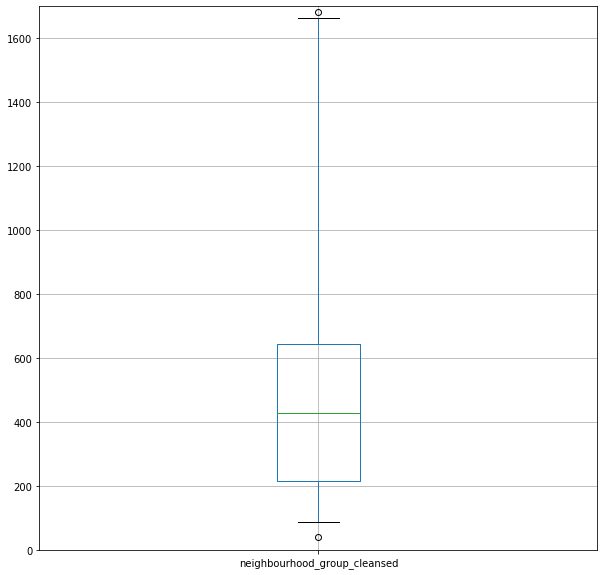

In [111]:
axes = count_airbnb_per_location.boxplot(column = ['neighbourhood_group_cleansed'], figsize=(10,10),whis=[5,95],return_type='axes')
axes.set_ylim(0,1700)
plt.show()

#### The 75% of the cities in Seattle has the amount of 600 airbnb's. And Our outliers are up of 1600 and below of 100, if we wanted a equitative distribution, we could drop the outliers and have the next distribution.

In [118]:
count_airbnb_per_location_dropped = count_airbnb_per_location[count_airbnb_per_location["neighbourhood_group_cleansed"]>100]
count_airbnb_per_location_dropped = count_airbnb_per_location[count_airbnb_per_location["neighbourhood_group_cleansed"]<1600]
count_airbnb_per_location_dropped

,neighbourhood_group_cleansed
Capitol Hill,930
Central Area,809
Queen Anne,645
West Seattle,481
Ballard,471
Cascade,446
Rainier Valley,429
Beacon Hill,316
Delridge,266
University District,244


In [175]:
neighbourhood_admited = list(count_airbnb_per_location_dropped.index)

With the array of cities that are not outliers we proceed to remove the outliers in the dataset

In [176]:
seattle_listings_all_cleaned = seattle_listings_all[seattle_listings_all["neighbourhood_group_cleansed"].isin(neighbourhood_admited)]

In [179]:
result = seattle_listings_all_cleaned.groupby('neighbourhood_group_cleansed')['price_x'].mean().sort_values(ascending=False)
result

neighbourhood_group_cleansed
Queen Anne             196.990698
Cascade                173.784753
Magnolia               164.096970
Central Area           153.814586
Ballard                152.000000
Capitol Hill           150.410753
Seward Park            149.409091
West Seattle           143.395010
Rainier Valley         120.799534
Lake City              120.695364
Northgate              117.657407
Beacon Hill            114.208861
Interbay               113.487179
University District    103.676230
Delridge               100.680451
Name: price_x, dtype: float64

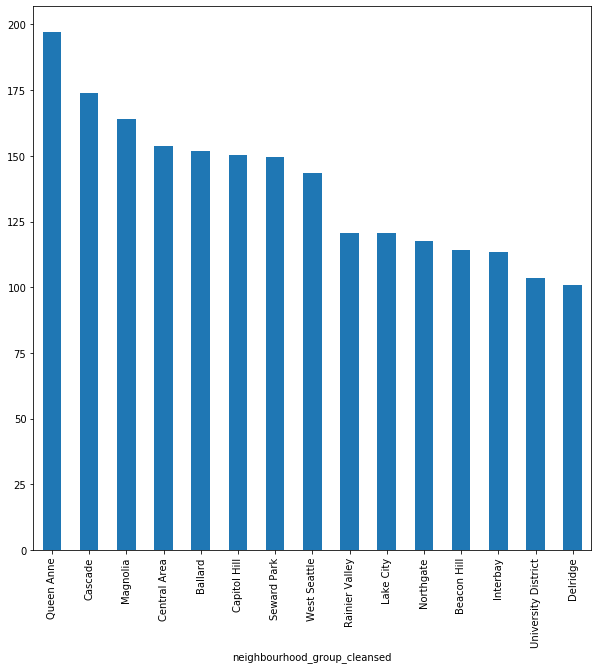

In [186]:
result.plot.bar(figsize=(10,10))

#### Using a equitative distribution without outliers, our most expensive city for airbnb is Queen Anne.

In [12]:
result_all_cities = seattle_listings_all.groupby('neighbourhood_group_cleansed')['price_x'].mean().sort_values(ascending=False)
result_all_cities

neighbourhood_group_cleansed
Downtown               288.447052
Queen Anne             196.990698
Cascade                173.784753
Magnolia               164.096970
Central Area           153.814586
Ballard                152.000000
Capitol Hill           150.410753
Seward Park            149.409091
West Seattle           143.395010
Other neighborhoods    125.824614
Rainier Valley         120.799534
Lake City              120.695364
Northgate              117.657407
Beacon Hill            114.208861
Interbay               113.487179
University District    103.676230
Delridge               100.680451
Name: price_x, dtype: float64

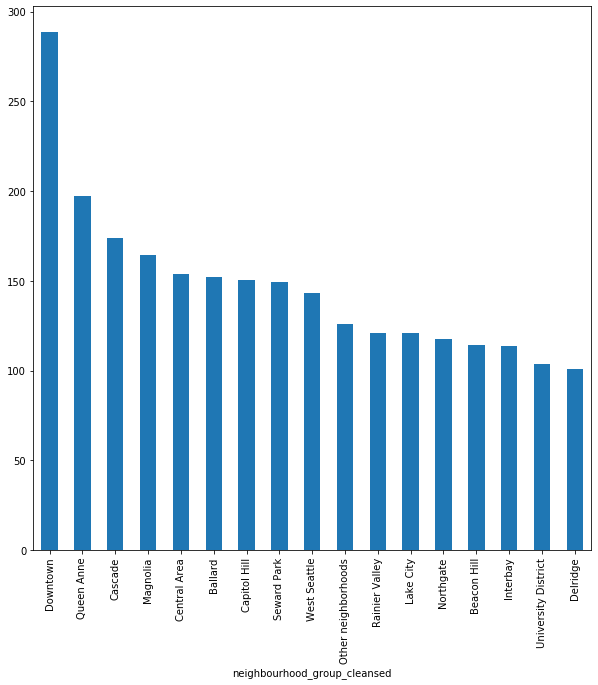

In [13]:
result_all_cities.plot.bar(figsize=(10,10))

#### Using all the cities in seattle we can said that the most expensive city for airbnb is the Downtown following by Queen Anne, and the city with more airbnb's is the Downtown too. 